<a href="https://colab.research.google.com/github/thiagolimaop/heart_disease/blob/main/An%C3%A1lise_e_predi%C3%A7%C3%A3o_de_doen%C3%A7a_cardiaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e predição de doença cardíaca

## 1. Definição do Problema

O dataset utilizado é proveniente do Centro Médico da Fundação Clínica de Clevelend. Este dataset é um subconjunto do dataset original que contem 75 atributos coletados em conjunto com outras três instituições médicas na europa. O objetivo deste trabalho consiste em realizar análises descritiva e exploratória para embasar a construção de um modelo de predição de doença cardíaca em pacientes. O problema de machine learning a ser tratado é o de classificação.

### **Informações dos atributos**

1. **age** - idade do paciente;
2. **sex** - gênero do paciente;
  - 0: Mulher
  - 1: Homem
3. **cp** - tipo de dor no peito;
  - 1: angina típica;
  - 2: angina atípica;
  - 3: dor não angina;
  - 4: assintomático;
4. **trtbps** - pressão arterial em repouso (em mm hg);
5. **chol** - colesterol em mg/dl obtido via sensor de IMC;
6. **fbs** - açúcar no sangue em jejum > 120 mg/dl?
  - 0: falso
  - 1: verdadeiro
7. **restecg** - resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão ST > 0,05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes.
8. **thalachh** - frequência cardíaca máxima alcançada;
9. **exgn** - angina induzida por exercício;
10. **oldpeak** - depressão de ST induzida por exercício em relação ao repouso;
11. **slp** - inclinação do pico do segmento ST do exercício;
12. **caa** - número de vasos principais (podendo variar de 0 a 3) colorido por fluoroscopia;
13. **thall** - teste de perfusão miocárdica com tálio;
  - 1: defeito corrigido
  - 2: normal
  - 3: defeito reversível
14. **output** - diagnóstico de doença cardíaca
 - 0: < 50% de estreitamento do diâmetro. Menos chance de doenças cardíacas.
 - 1: > 50% de estreitamento do diâmetro. Mais chances de doenças cardíacas.

In [178]:
# Importação das bibliotecas usadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
import matplotlib as mpl
from abc import ABC, abstractmethod
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

## 2. Carga de Dados

Vamos iniciar carregando o arquivo .csv através do pacote Pandas.

In [179]:
df = pd.read_csv('https://raw.githubusercontent.com/thiagolimaop/heart_disease/main/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Como explicado anteriormente no entendimento dos dados, muitos atributos qualitativos estão representados por números. Então para facilitar a clareza e interpretação dos dados e criação de gráficos e visualizações, iremos converter esses atributos representados por números em strings.

In [180]:
# Dicionário de mapeamento de valores numéricos para strings

gender_mapping = {0: 'Mulher', 1: 'Homem'}
cp_mapping = {0: 'Assintomático', 1: 'Angina Típica', 2: 'Angina Atípica', 3: 'Dor não angina'}
fsb_mapping = {0: 'Falso', 1: 'Verdadeiro'}
restecg_mapping = {0: 'Normal', 1: 'Anormalidade de onda', 2: 'Hipertrofia Ventricular'}
exng_mapping = {0: 'Não', 1: 'Sim'}
slp_mapping = {0: 'Ascendente', 1: 'Plano', 2: 'Descendente'}
thall_mapping = {0: '', 1: 'Defeito Corrigido', 2: 'Normal', 3: 'Defeito Reversível'}

df['sex'] = df['sex'].map(gender_mapping)
df['cp'] = df['cp'].map(cp_mapping)
df['fbs'] = df['fbs'].map(fsb_mapping)
df['restecg'] = df['restecg'].map(restecg_mapping)
df['exng'] = df['exng'].map(exng_mapping)
df['slp'] = df['slp'].map(slp_mapping)
df['thall'] = df['thall'].map(thall_mapping)

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Homem,Dor não angina,145,233,Verdadeiro,Normal,150,Não,2.3,Ascendente,0,Defeito Corrigido,1
1,37,Homem,Angina Atípica,130,250,Falso,Anormalidade de onda,187,Não,3.5,Ascendente,0,Normal,1
2,41,Mulher,Angina Típica,130,204,Falso,Normal,172,Não,1.4,Descendente,0,Normal,1
3,56,Homem,Angina Típica,120,236,Falso,Anormalidade de onda,178,Não,0.8,Descendente,0,Normal,1
4,57,Mulher,Assintomático,120,354,Falso,Anormalidade de onda,163,Sim,0.6,Descendente,0,Normal,1


## 3. Análise de Dados

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [181]:
# Mostra as dimensões do dataset
df.shape

(303, 14)

In [182]:
# Mostra as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    object 
 11  caa       303 non-null    int64  
 12  thall     303 non-null    object 
 13  output    303 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 33.3+ KB


In [183]:
# Mostra as 10 primeiras linhas do dataset
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Homem,Dor não angina,145,233,Verdadeiro,Normal,150,Não,2.3,Ascendente,0,Defeito Corrigido,1
1,37,Homem,Angina Atípica,130,250,Falso,Anormalidade de onda,187,Não,3.5,Ascendente,0,Normal,1
2,41,Mulher,Angina Típica,130,204,Falso,Normal,172,Não,1.4,Descendente,0,Normal,1
3,56,Homem,Angina Típica,120,236,Falso,Anormalidade de onda,178,Não,0.8,Descendente,0,Normal,1
4,57,Mulher,Assintomático,120,354,Falso,Anormalidade de onda,163,Sim,0.6,Descendente,0,Normal,1
5,57,Homem,Assintomático,140,192,Falso,Anormalidade de onda,148,Não,0.4,Plano,0,Defeito Corrigido,1
6,56,Mulher,Angina Típica,140,294,Falso,Normal,153,Não,1.3,Plano,0,Normal,1
7,44,Homem,Angina Típica,120,263,Falso,Anormalidade de onda,173,Não,0.0,Descendente,0,Defeito Reversível,1
8,52,Homem,Angina Atípica,172,199,Verdadeiro,Anormalidade de onda,162,Não,0.5,Descendente,0,Defeito Reversível,1
9,57,Homem,Angina Atípica,150,168,Falso,Anormalidade de onda,174,Não,1.6,Descendente,0,Normal,1


In [184]:
# Mostra as 10 últimas linhas do dataset
df.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,Homem,Angina Atípica,152,212,Falso,Normal,150,Não,0.8,Plano,0,Defeito Reversível,0
294,44,Homem,Assintomático,120,169,Falso,Anormalidade de onda,144,Sim,2.8,Ascendente,0,Defeito Corrigido,0
295,63,Homem,Assintomático,140,187,Falso,Normal,144,Sim,4.0,Descendente,2,Defeito Reversível,0
296,63,Mulher,Assintomático,124,197,Falso,Anormalidade de onda,136,Sim,0.0,Plano,0,Normal,0
297,59,Homem,Assintomático,164,176,Verdadeiro,Normal,90,Não,1.0,Plano,2,Defeito Corrigido,0
298,57,Mulher,Assintomático,140,241,Falso,Anormalidade de onda,123,Sim,0.2,Plano,0,Defeito Reversível,0
299,45,Homem,Dor não angina,110,264,Falso,Anormalidade de onda,132,Não,1.2,Plano,0,Defeito Reversível,0
300,68,Homem,Assintomático,144,193,Verdadeiro,Anormalidade de onda,141,Não,3.4,Plano,2,Defeito Reversível,0
301,57,Homem,Assintomático,130,131,Falso,Anormalidade de onda,115,Sim,1.2,Plano,1,Defeito Reversível,0
302,57,Mulher,Angina Típica,130,236,Falso,Normal,174,Não,0.0,Plano,1,Normal,0


In [185]:
# Verifica o tipo de dataset de cada atributo
df.dtypes

age           int64
sex          object
cp           object
trtbps        int64
chol          int64
fbs          object
restecg      object
thalachh      int64
exng         object
oldpeak     float64
slp          object
caa           int64
thall        object
output        int64
dtype: object

In [186]:
# Mostra as resumo estatístico descritivo do dataset
df.describe()

,age,trtbps,chol,thalachh,oldpeak,caa,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


In [187]:
# Verifica a distribuição das classes
df.groupby('output').size()

output
0    138
1    165
dtype: int64

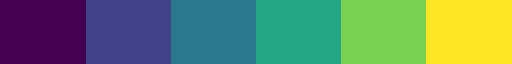

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [188]:
# Define paleta de cores

# # alternativa A: definição manual das cores a partir de lista de cores em hex
# coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

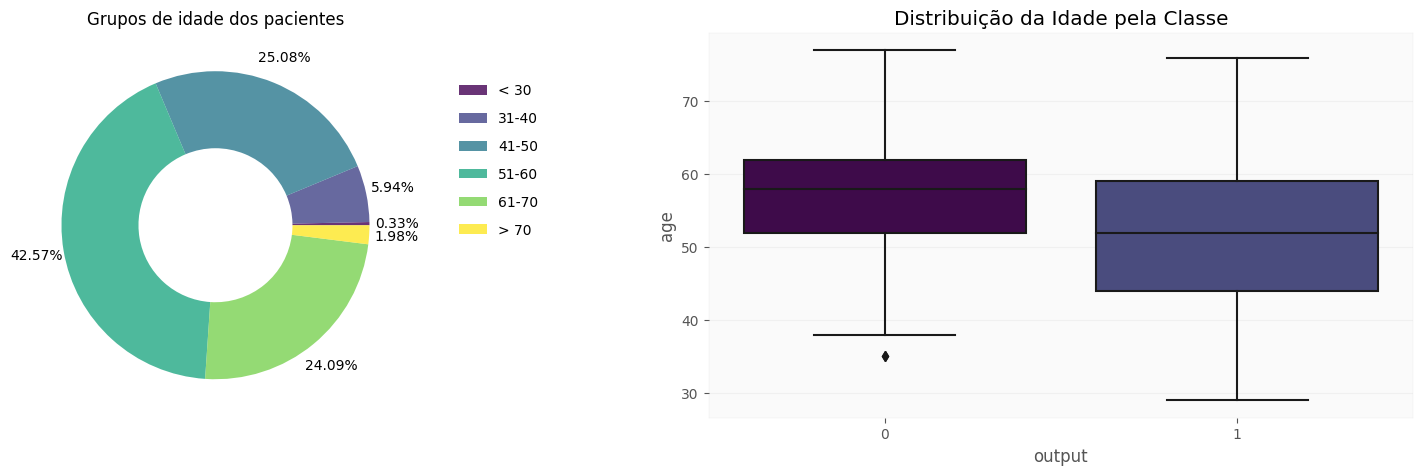

In [189]:
class NumericalDistribuition(ABC):
    def __init__(self, attr, pie_title, pie_legends, figsize, box_plot_title):
        self.attr = attr
        self.pie_title = pie_title
        self.pie_legends = pie_legends
        self.figsize = figsize
        self.box_plot_title = box_plot_title

    @abstractmethod
    def grouping(self, value):
        pass

    def display_plot(self, df, _class):
        # Cria uma figura com um eixo para cada gráfico
        fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=self.figsize)

        # Criando o dataframe resumido
        df_chart = df[self.attr].apply(_class.grouping).value_counts(sort=False)

        # Plota o gráfico de pizza no primeiro eixo
        ax1.pie(df_chart.sort_index(), autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
        ax1.legend(self.pie_legends, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
        ax1.set_title(self.pie_title, fontsize=12)

        # Plota o boxplot no segundo eixo
        sns.boxplot(y=self.attr, x="output", data=df, palette=coresViridis, ax=ax2)

        # Ajusta os títulos e as legendas
        ax2.set_title(self.box_plot_title)

        plt.show()


# Dados para o gráfico de pizza
attr = 'age'
pie_title = 'Grupos de idade dos pacientes'
pie_legends = ['< 30','31-40','41-50','51-60','61-70', '> 70']
figsize = (20, 5)
box_plot_title = 'Distribuição da Idade pela Classe'


class AgeChart(NumericalDistribuition):
    def grouping(value):
        if value < 30:
            return 0
        elif value >= 30 and value <= 40:
            return 1
        elif value >= 40 and value <= 50:
            return 2
        elif value >= 50 and value <= 60:
            return 3 
        elif value >= 60 and value <= 70:
            return 4        
        else:
            return 5

charts = AgeChart(attr, pie_title, pie_legends, figsize, box_plot_title)
charts.display_plot(df, AgeChart)

É possível perceber que pelo gráfico que **mais de 90%** dos pacientes possui  **40 anos ou mais** de idade. Além do mais é possível perceber que as distribuições de idade pela classe de saída tem uma pequena diferença, o que torna o atributo **age** provavelmente relevante para o modelo de classificação.

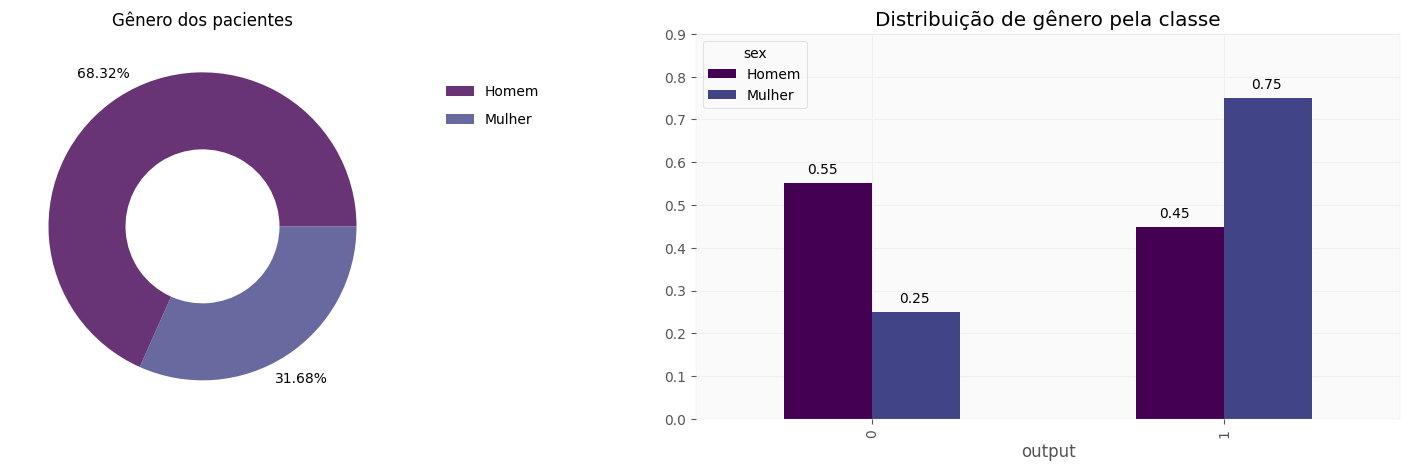

In [190]:
class CategoricalDistribuition(ABC):
    def __init__(self, attr, pie_title, figsize, bar_title, initial, step):
        self.attr = attr
        self.pie_title = pie_title
        self.figsize = figsize
        self.bar_title = bar_title
        self.initial = initial
        self.step = step

    def display_plot(self, df):
        # Cria uma figura com um eixo para cada gráfico
        fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=self.figsize)

        # Dados para o gráfico de pizza
        labels = sorted(list(df[self.attr].unique()))

        # Plota o gráfico de pizza no primeiro eixo
        ax1.pie(df[self.attr].value_counts().sort_index(), autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
        ax1.legend(labels, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
        ax1.set_title(self.pie_title, fontsize=12)

        # gerar a tabela de frequência cruzada
        crosstab = pd.crosstab(df[self.attr], df['output'], normalize='index')

        # Plota o gráfico de barras com as distribuições no segundo eixo
        dist = crosstab.transpose()
        dist.plot(kind='bar', color=coresViridis, ax=ax2)

        # adicionar os valores no topo das barras dos grupos da classe de saída
        for i in range(len(dist)):
            valor = dist.iloc[i].values
            for j, v in enumerate(valor):
                x = i + (j * self.step) - self.initial
                ax2.text(x, v + 0.015, str(round(v, 2)), ha='center', va='bottom')

        # Ajusta os títulos e as legendas
        ax2.set_title(self.bar_title)
        y = dist.values.flatten()
        plt.ylim(0, max(y)+0.15)

        plt.show()


# Dados para o gráfico de pizza
attr = 'sex'
pie_title = 'Gênero dos pacientes'
figsize = (20, 5)
bar_title = 'Distribuição de gênero pela classe'
initial = 0.14
step = 0.26

charts = CategoricalDistribuition(attr, pie_title, figsize, bar_title, initial, step)
charts.display_plot(df)

Podemos ver que a quantidade de pacientes do sexo masculino é muito superior à quantidade das do sexo feminino, no entanto a probabilidade de incidencia de estreitamento do diâmetro das artérias coronárias em mulheres é mais comum do que em homens.

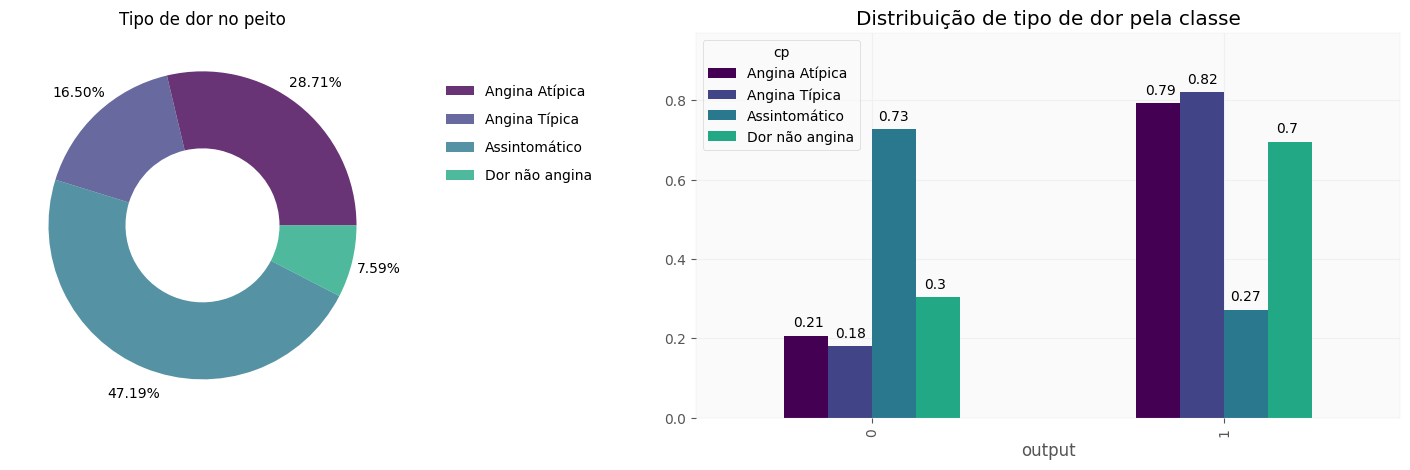

In [191]:
# Dados para o gráfico de pizza
attr = 'cp'
pie_title = 'Tipo de dor no peito'
figsize = (20, 5)
bar_title = 'Distribuição de tipo de dor pela classe'
initial = 0.18
step = 0.12

charts = CategoricalDistribuition(attr, pie_title, figsize, bar_title, initial, step)
charts.display_plot(df)

Angina é uma condição médica caracterizada por dor ou desconforto no peito. No gráfico podemos ver que 47% dos pacientes são assintomáticos em relação à essa dor, e que existe alta probabilidade de pessoas assintomáticas possuirem menos de 50% do estreitamento do diâmetro das artérias coronárias, o que reduz bastante a probabilidade de doenças cardíacas nesse grupo. Já pacientes com as demais tipos de dor, tem uma alta probabilidade de ter mais de 50% do estreitamento do diâmetro das artérias coronárias, o que aumenta as chances de doenças cardíacas.

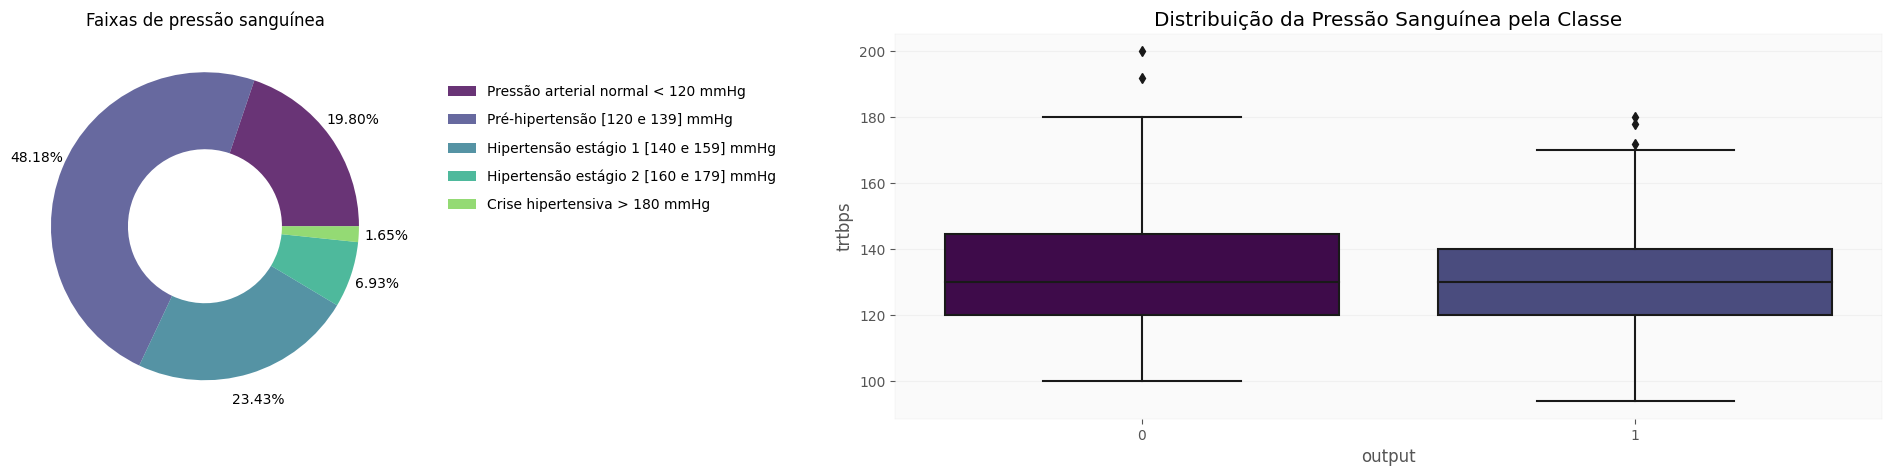

In [192]:
# Dados para o gráfico de pizza
attr = 'trtbps'
pie_title = 'Faixas de pressão sanguínea'
box_plot_title = 'Distribuição da Pressão Sanguínea pela Classe'
figsize = (28, 5)
pie_legends = [
                'Pressão arterial normal < 120 mmHg', 
                'Pré-hipertensão [120 e 139] mmHg', 
                'Hipertensão estágio 1 [140 e 159] mmHg', 
                'Hipertensão estágio 2 [160 e 179] mmHg', 
                'Crise hipertensiva > 180 mmHg'
              ]


class TrtbpsChart(NumericalDistribuition):
    def grouping(value):
        if value < 120:
            return 0
        elif value >= 120 and value <= 139:
            return 1
        elif value >= 140 and value <= 159:
            return 2
        elif value >= 160 and value <= 179:
            return 3
        else:
            return 4

charts = TrtbpsChart(attr, pie_title, pie_legends, figsize, box_plot_title)
charts.display_plot(df, TrtbpsChart)

Levando em consideração que a pressão sanguínea foi medida em repouso, temos mais de 80% dos pacientes da amostra com pressão sanguínea acima do considerado normal. A diferença entre as distribuições no segundo gráfico são bem pequenas, visto que elas quase se sobrepõem, o que provavelmente torna este atributo um pouco menos relevante para a construção do modelo de classificação. Além disso, a classe crise hipertensiva representa apenas 1,65% dos casos, o que torna essa classe rara e provavelmente mais difícil classificar pelo modelo.

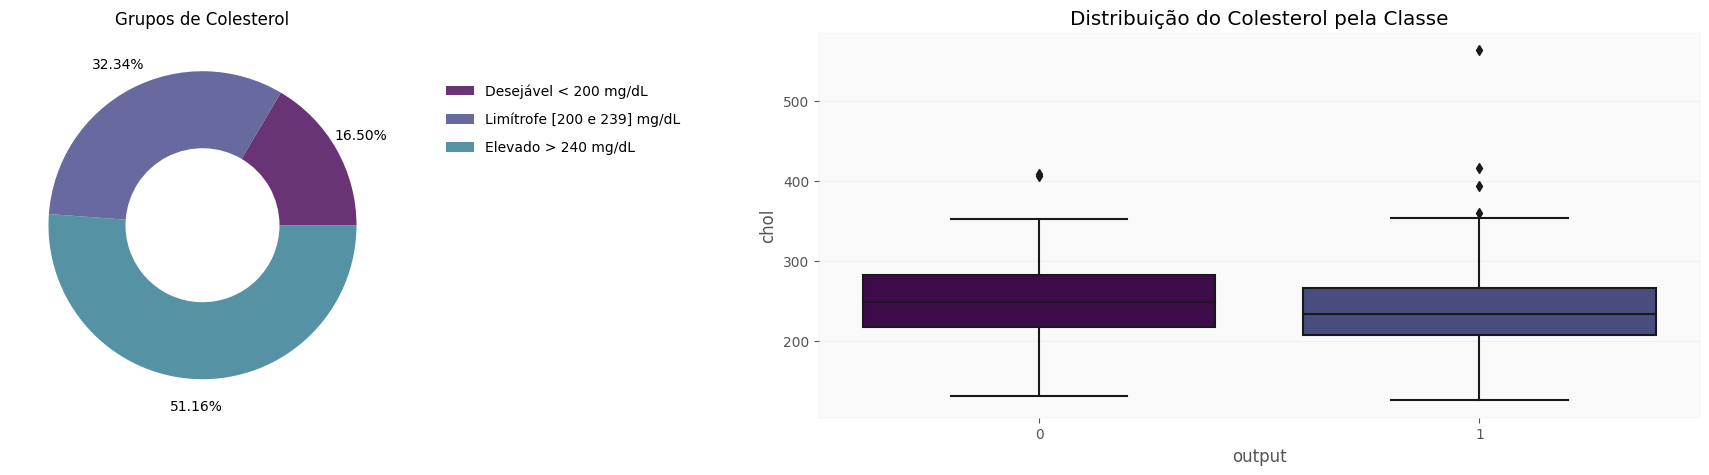

In [193]:
# Dados para o gráfico de pizza
attr = 'chol'
pie_title = 'Grupos de Colesterol'
box_plot_title = 'Distribuição do Colesterol pela Classe'
figsize = (25, 5)
pie_legends = [
                'Desejável < 200 mg/dL', 
                'Limítrofe [200 e 239] mg/dL', 
                'Elevado > 240 mg/dL'
              ]

class CholesterolChart(NumericalDistribuition):
    def grouping(value):
        if value < 200:
            return 0
        elif value >= 200 and value <= 239:
            return 1
        else:
            return 2


charts = CholesterolChart(attr, pie_title, pie_legends, figsize, box_plot_title)
charts.display_plot(df, CholesterolChart)

Veja que o apesar de mais de 80% dos pacientes apresentar colesterol próximo do limite superior (Limítrofe) ou Elevado, as distribuições do colesterol pela classe de saída praticamente se sobrepõem, porém é perceptível uma diferença entre os intervalos interquartis, configurando este atributo como provavelmente de baixa relevancia para a construção do modelo de classificação.

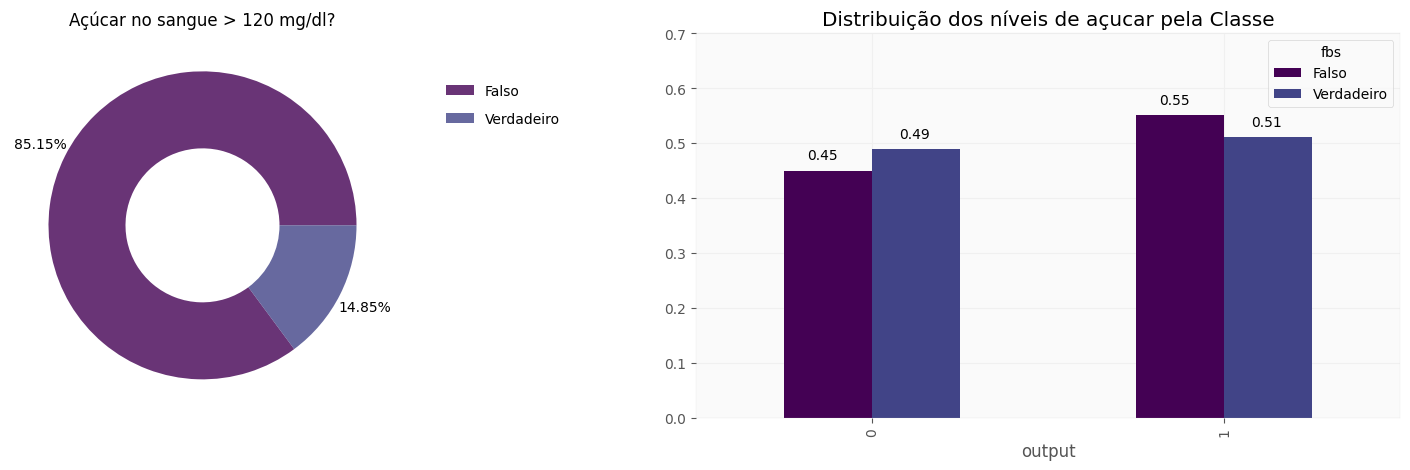

In [194]:
# Dados para o gráfico de pizza
attr = 'fbs'
pie_title = 'Açúcar no sangue > 120 mg/dl?'
figsize = (20, 5)
bar_title = 'Distribuição dos níveis de açucar pela Classe'
initial = 0.14
step = 0.26

charts = CategoricalDistribuition(attr, pie_title, figsize, bar_title, initial, step)
charts.display_plot(df)

Mais de 85% da base possui os níveis de açucar considerado normal, e mesmo asim as distribuições entre as classes quase se sobre põem, o que indica uma relevencia provavelmente bem baixa deste atributo para a construção do modelo.

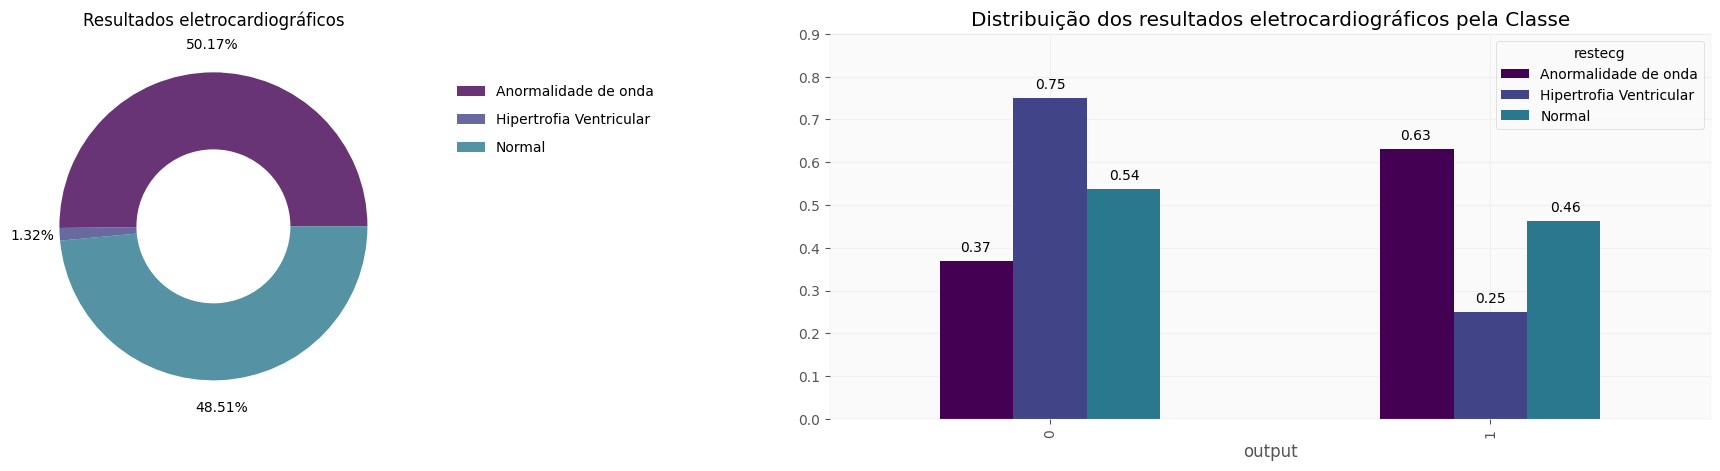

In [195]:
# Dados para o gráfico de pizza
attr = 'restecg'
pie_title = 'Resultados eletrocardiográficos'
figsize = (25, 5)
bar_title = 'Distribuição dos resultados eletrocardiográficos pela Classe'
initial = 0.17
step = 0.17

charts = CategoricalDistribuition(attr, pie_title, figsize, bar_title, initial, step)
charts.display_plot(df)

É possível notar que pacientes que apresentaram anormalidade de onda nos resultados eletrocardiográficos, possuem maiores chances de ter mais de 50% estreitamento do diâmetro das artérias coronárias. O mesmo não acontece com os demais resultados dos testes eletrocardiográficos. De qualquer modo, vemos distribuições pela classe de saída bem distintas apenas no que se refere a classe **anormalidade da onda**, o que indica que este atributo pode ser provavelmente relevante para a construção do modelo no que tange a esta classe. A baixa representatividade dos pacientes com Hipertrofia ventricular, provavelmente torna esta classe do atributo bem difícil de classificar em relação à classe de saída.

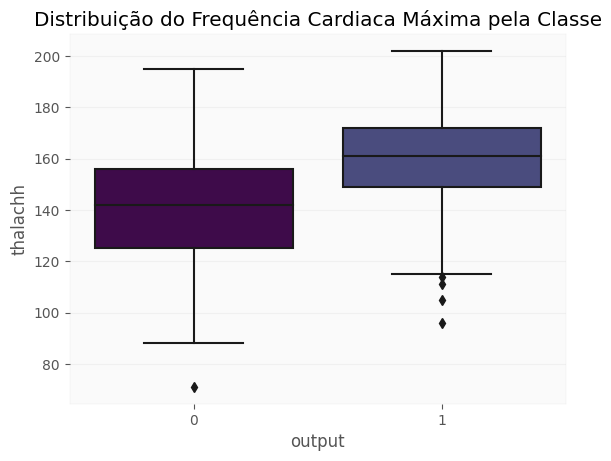

In [196]:
# Dados para o gráfico de pizza
attr = 'thalachh'
box_plot_title = 'Distribuição do Frequência Cardiaca Máxima pela Classe'

# Plota o boxplot no segundo eixo
ax = sns.boxplot(y=attr, x="output", data=df, palette=coresViridis)

# Ajusta os títulos e as legendas
ax.set_title(box_plot_title)

plt.show()

Não é possível agrupar as frequências cardiacas máximas alcançadas em classes, pois isso vai depender de vários fatores que envolvem idade, sexo e nível de sedentarismo. Mas é possível ver como as distribuições deste atributo pela classe de saída destoam completamente, o que torna este atributo provavelmente de alta relevancia para o modelo.

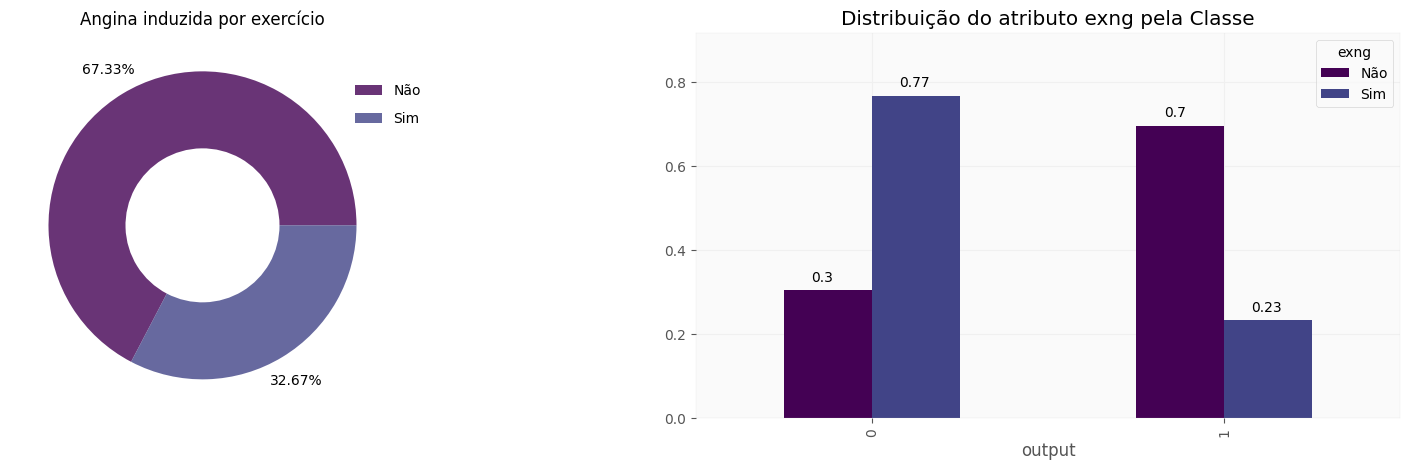

In [197]:
# Dados para o gráfico de pizza
attr = 'exng'
pie_title = 'Angina induzida por exercício'
figsize = (20, 5)
bar_title = 'Distribuição do atributo exng pela Classe'
initial = 0.14
step = 0.26

charts = CategoricalDistribuition(attr, pie_title, figsize, bar_title, initial, step)
charts.display_plot(df)

A angina induzida por exercício é uma condição caracterizada por dor ou desconforto no peito que ocorre durante ou após atividade física intensa, como correr, andar de bicicleta ou praticar esportes. O que vemos acima é que mais de 67% não apresentaram angina induzida por exercício, mas apesar disso pessoas que não apresentam essa dor tem uma probabilidade maior de terem mais de 50% do estreitamento do diâmetro das artérias coronárias o que poderia indicar uma probabilidade maior de doenças cardiacas.

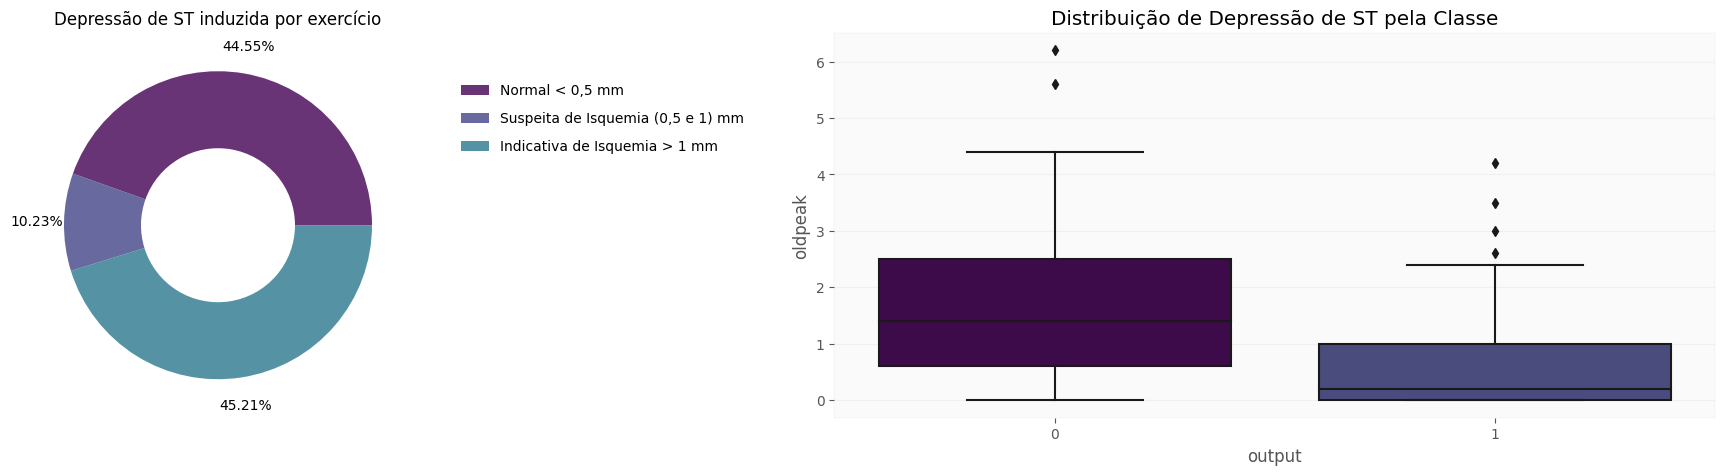

In [198]:
# Dados para o gráfico de pizza
attr = 'oldpeak'
pie_title = 'Depressão de ST induzida por exercício'
box_plot_title = 'Distribuição de Depressão de ST pela Classe'
figsize = (25, 5)
pie_legends = [
                'Normal < 0,5 mm', 
                'Suspeita de Isquemia (0,5 e 1) mm', 
                'Indicativa de Isquemia > 1 mm'
              ]

class OldpeakChart(NumericalDistribuition):
    def grouping(value):
        if value <= 0.5:
            return 0
        elif value > 0.5 and value < 1:
            return 1
        else:
            return 2


charts = OldpeakChart(attr, pie_title, pie_legends, figsize, box_plot_title)
charts.display_plot(df, OldpeakChart)

A Sociedade Europeia de Cardiologia (ESC) define a seguinte classificação para a depressão do segmento ST durante o teste de esforço:

- depressão do segmento ST de 0,5 mm ou menos: considerada normal;
- depressão do segmento ST entre 0,5 mm e 1 mm: considerada suspeita de isquemia;
- depressão do segmento ST de 1 mm ou mais: considerada indicativa de isquemia significativa.

Apesar da classificação proposta pela ESC, a distribuição acima mostra um intervalo interquartil entre 0 e 1 mm de depressão ST para pessoas diagnosticadas mais de 50% de estreitamento do diâmetro das artérias coronárias. As distribuições são bem disformes, o que torna esse atributo provavelmente valioso para a construção do modelo.

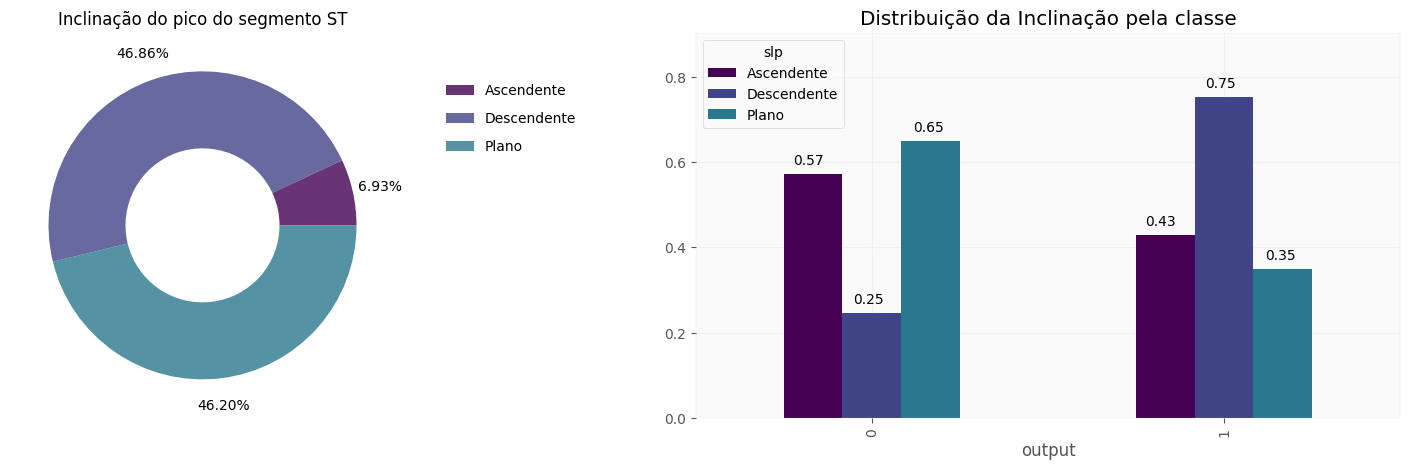

In [199]:
# Dados para o gráfico de pizza
attr = 'slp'
pie_title = 'Inclinação do pico do segmento ST'
figsize = (20, 5)
bar_title = 'Distribuição da Inclinação pela classe'
initial = 0.18
step = 0.17

charts = CategoricalDistribuition(attr, pie_title, figsize, bar_title, initial, step)
charts.display_plot(df)

Acima, vemos que pessoas com inclinação **descendente** do pico de ST possuem mais chances de terem mais 50% de estreitamento do diâmetro das artérias coronárias. O que não acontece nos demais casos. As distribuições da inclinação do pico do segmento ST pela classe mostra grandes diferenças, tornando esse atributo provavelmente bem relevante para a construção do modelo, salvo a classe **ascendente** com baixa representatividade.

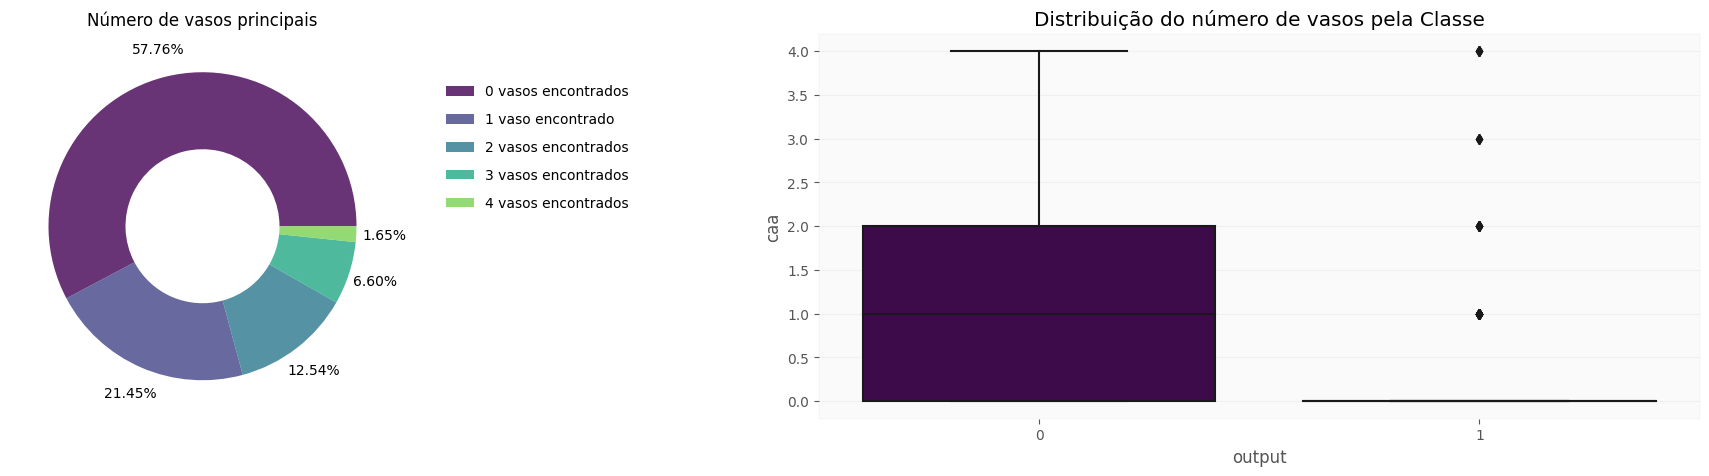

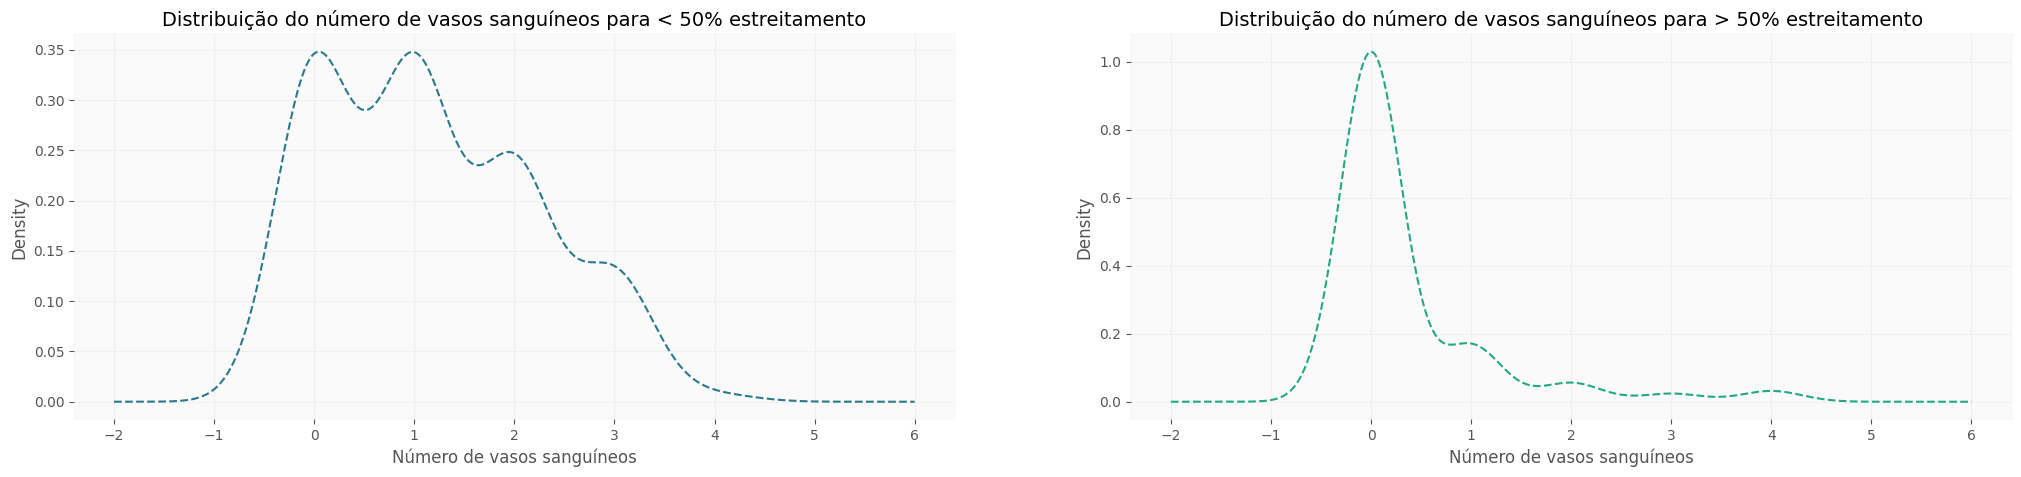

In [200]:
# Dados para o gráfico de pizza
attr = 'caa'
pie_title = 'Número de vasos principais'
box_plot_title = 'Distribuição do número de vasos pela Classe'
figsize = (25, 5)
pie_legends = [
                '0 vasos encontrados', 
                '1 vaso encontrado', 
                '2 vasos encontrados', 
                '3 vasos encontrados', 
                '4 vasos encontrados'
              ]


class CAAChart(NumericalDistribuition):
    def grouping(value):
        return value

charts = CAAChart(attr, pie_title, pie_legends, figsize, box_plot_title)
charts.display_plot(df, CAAChart)

fig2, ax = plt.subplots(1, 2, figsize=(25,5), sharey=False)

df[df['output']==0]['caa'].plot.kde(ls='--', color=coresViridis[2], ax=ax[0])
ax[0].set_xlabel('Número de vasos sanguíneos', fontsize=12)
ax[0].set_title('Distribuição do número de vasos sanguíneos para < 50% estreitamento', fontsize=14)

df[df['output']==1]['caa'].plot.kde(ls='--', color=coresViridis[3], ax=ax[1])
ax[1].set_xlabel('Número de vasos sanguíneos', fontsize=12)
ax[1].set_title('Distribuição do número de vasos sanguíneos para > 50% estreitamento', fontsize=14)
plt.show()


O exame de fluoroscopia é um procedimento de diagnóstico por imagem que usa raios-X para produzir imagens em tempo real dos órgãos internos do corpo, incluindo os vasos principais. No entanto, pode haver situações em que os vasos principais não são visíveis ou podem parecer ausentes no exame de fluoroscopia. Mas diferente do que foi abordado acima, o coração apresenta 4 tipos de vasos principais: as artérias coronárias direita e esquerda e as artérias pulmonares direita e esquerda. Então podemos dizer que este atributo não possui valores nulos e nem valores fora da margem aceitável.

Essa talvez seja um dos atributos com maior importancia para ajudar na construção do modelo de classificação, devida a diferença gritante entre a distribuição do atributo pelas duas classes de saída.

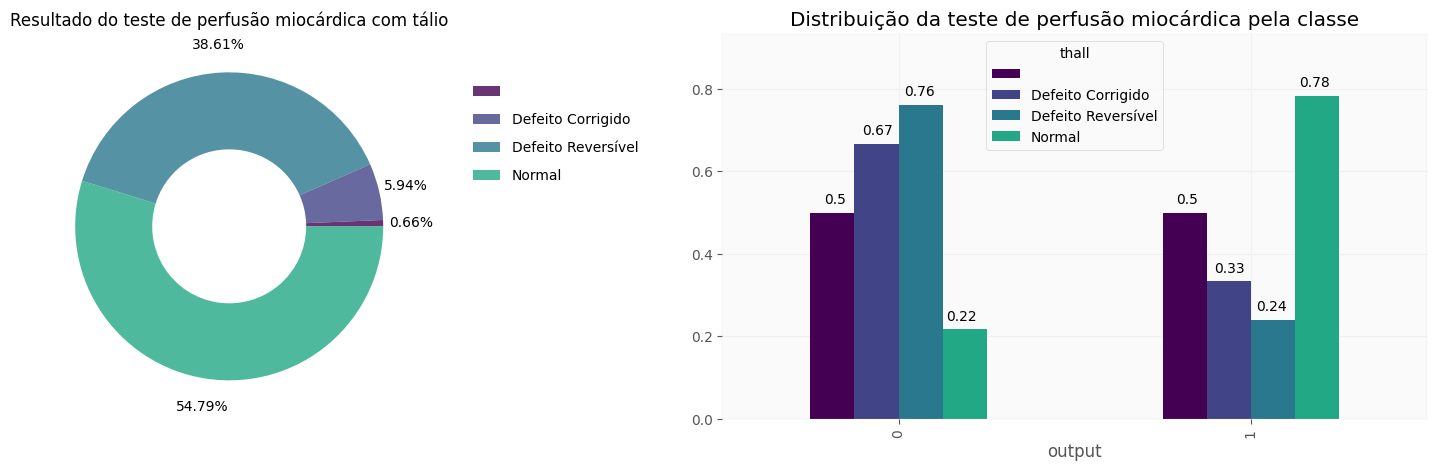

In [201]:
# Dados para o gráfico de pizza
attr = 'thall'
pie_title = 'Resultado do teste de perfusão miocárdica com tálio'
figsize = (20, 5)
bar_title = 'Distribuição da teste de perfusão miocárdica pela classe'
initial = 0.18
step = 0.12

charts = CategoricalDistribuition(attr, pie_title, figsize, bar_title, initial, step)
charts.display_plot(df)

Os gráficos mostram que pacientes que apresentam um resultado considerado **normal** no teste de perfusão miocárdica com tálio, apresentam muito mais chances terem mais de 50% de estreitamento do diâmetro das artérias coronárias, o que não acontece com os demais resultados. Também é possível notar que 0,66% dos pacientes apresentam valores nulos para este atributo, logo esses valores devem ser previamente tratados na etapa de pré processamento. No mais, esse atributo se mostra provavelmente valioso para a construção do modelo de classificação, com distribuições bem distintas e boa representatividade entre as classes, excetuando a classe **defeito corrigido**.

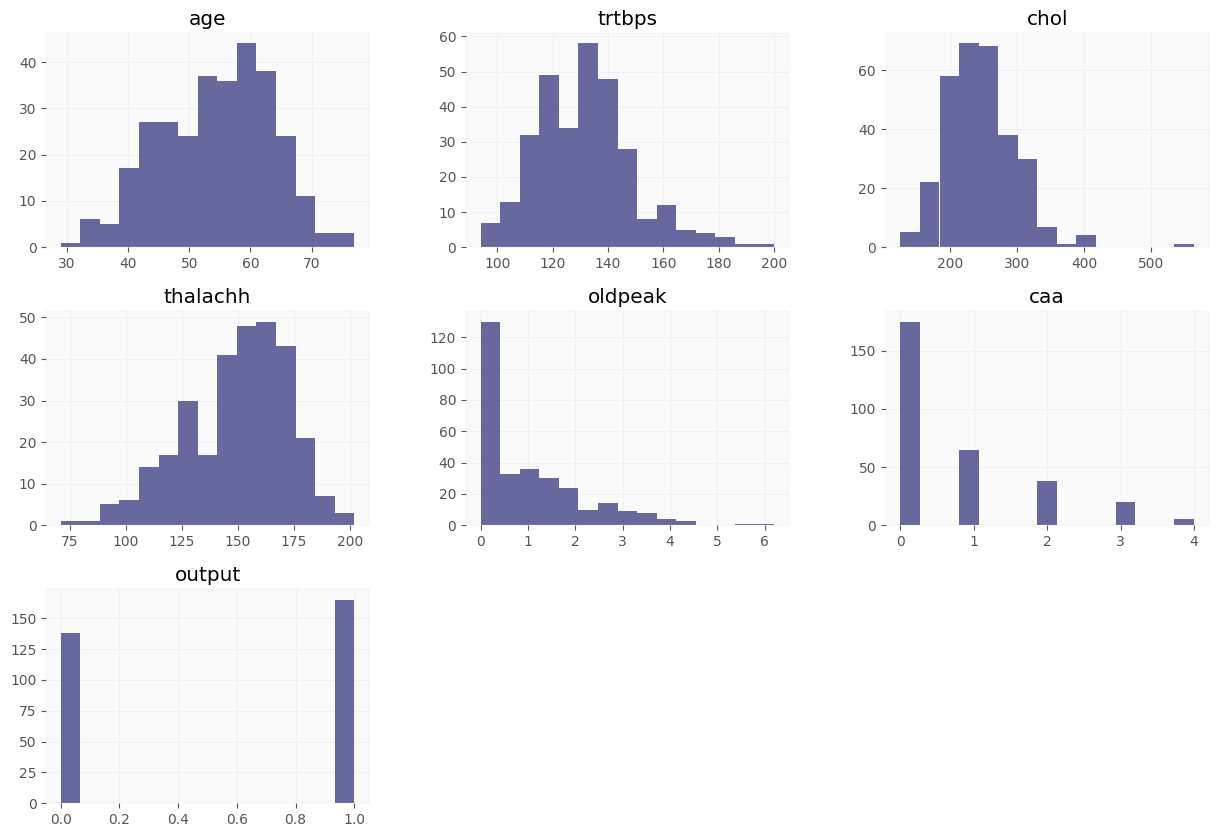

In [202]:
# Histogramas
df.hist(figsize = (15,10), bins=15, alpha=0.8, color=corDefault)
plt.show()

A distribuição do atributo **age** mostra a classe modal um pouco diferente da média. Já os atributos **trtbps** e **chol** mostra uma classe modal um pouco mais próxima da média, o que poderia caracterizar distribuições aproximadamente normais. Já os demais atributos mostram uma distribuição claramente exponencial.



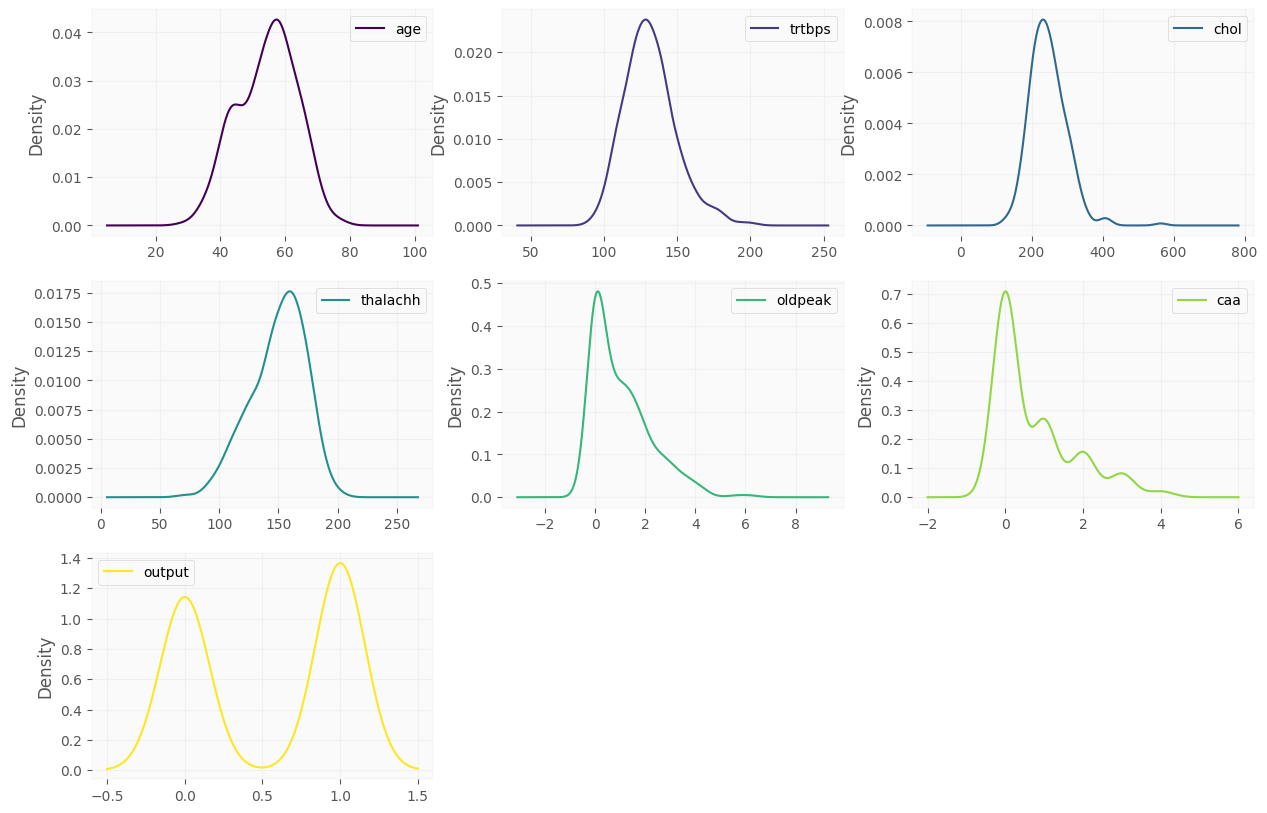

In [203]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10), colormap='viridis')
plt.show()

O density plot do atributo **age** mostra uma curva próxima da curva de sino, enquanto que os atributos **trtbps** e **chol** mostram um curva de sino quase perfeita. Já os demais atributos (excetuando o **output**) se confirmam como distribuições exponenciais. Logo, vemos que é necessário aplicar tanto a tecnica de normalização quanto a padronização dos dados.

<ipython-input-204-0be23d42f9d0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis', vmin=-1, vmax=1);


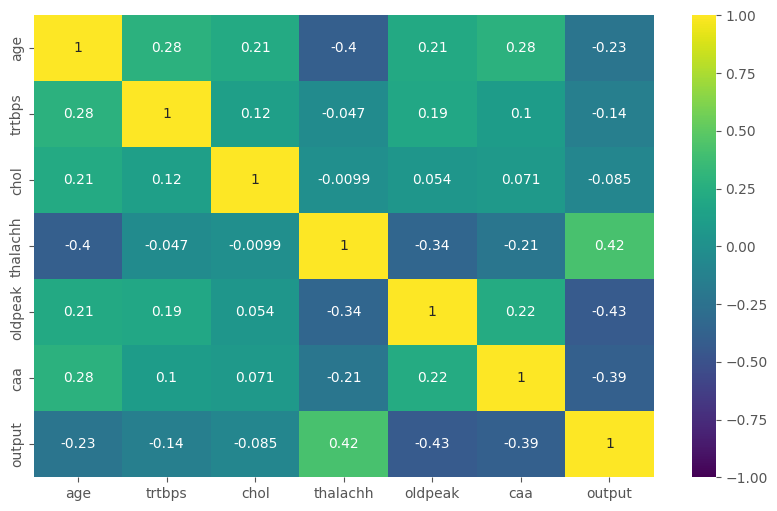

In [204]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', vmin=-1, vmax=1);

A matriz de correlação mostrada acima não mostra nenhuma correlação moderada ou forte, o que é altamente benéfico, visto que atributos altamente correlacionados podem afetar a precisão do modelo.

## 4. Pré-Processamento de dados

Nesta etapa vamos realizar algumas operações de preparação de dados para construção do modelo. Inicialmente vamos começar tratando os valores faltantes.

### 4.1 Limpesa dos dados

In [205]:
# verificando nulls no dataset
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Acima não vemos nenhum valor nulo, porém durante a análise exploratória, identificamos valores nulos para o atributo **thall**. Para tratar esses dados, iremos preencher esses valores usando a moda.

In [206]:
# salvando um NOVO dataset para tratamento de missings para não sobrescrever o dataset original

# recuperando os nomes das colunas
col = list(df.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
new_df = df[col[0:-1]]

# substituindo os zeros pela moda
new_df['thall'] = df['thall'].apply(lambda x: df['thall'].mode()[0] if (x == '') else x)

new_df['thall'].value_counts()

<ipython-input-206-de2ef289ed76>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['thall'] = df['thall'].apply(lambda x: df['thall'].mode()[0] if (x == '') else x)


Normal                168
Defeito Reversível    117
Defeito Corrigido      18
Name: thall, dtype: int64

### 4.2 Codificação de variáveis categóricas

Utilizaremos a técnica do One-hot encoding para codicar as variáveis categóricas. Essa técnica é útil para permitir que algoritmos de ML possam trabalhar com dados categóricos, que normalmente não podem ser processados diretamente por esses algoritmos.

In [207]:
# Selecionando os atributos categóricos
attrs = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall']

# Aplicando o one hot encoding aos atributos categóricos sem classes redundantes
selected_features = pd.get_dummies(new_df, prefix=attrs, columns=attrs, drop_first=True)
selected_features

,age,trtbps,chol,thalachh,oldpeak,caa,sex_Mulher,cp_Angina Típica,cp_Assintomático,cp_Dor não angina,fbs_Verdadeiro,restecg_Hipertrofia Ventricular,restecg_Normal,exng_Sim,slp_Descendente,slp_Plano,thall_Defeito Reversível,thall_Normal
0,63,145,233,150,2.3,0,0,0,0,1,1,0,1,0,0,0,0,0
1,37,130,250,187,3.5,0,0,0,0,0,0,0,0,0,0,0,0,1
2,41,130,204,172,1.4,0,1,1,0,0,0,0,1,0,1,0,0,1
3,56,120,236,178,0.8,0,0,1,0,0,0,0,0,0,1,0,0,1
4,57,120,354,163,0.6,0,1,0,1,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,0,0,0,1,0,1,1,0
299,45,110,264,132,1.2,0,0,0,0,1,0,0,0,0,0,1,1,0
300,68,144,193,141,3.4,2,0,0,1,0,1,0,0,0,0,1,1,0
301,57,130,131,115,1.2,1,0,0,1,0,0,0,0,1,0,1,1,0


Acima é possível ver que a classes com baixa representatividade como **hipertrofia ventricular** e **dor não angina** que se tornaram atributos, e provavelmente essas classes deram lugar à classes com maior representatividade, o que pode afetar a precisão final do modelo. Logo, acho interessante usar o one-hot encoding sem remover as redundâncias, até mesmo para criar dois tipos de modelos para efeito de comparação.

In [208]:
# Aplicando o one hot encoding aos atributos categóricos sem excluir os reduntandes
all_features = pd.get_dummies(new_df, prefix=attrs, columns=attrs)
all_features

,age,trtbps,chol,thalachh,oldpeak,caa,sex_Homem,sex_Mulher,cp_Angina Atípica,cp_Angina Típica,...,restecg_Hipertrofia Ventricular,restecg_Normal,exng_Não,exng_Sim,slp_Ascendente,slp_Descendente,slp_Plano,thall_Defeito Corrigido,thall_Defeito Reversível,thall_Normal
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,41,130,204,172,1.4,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,1
3,56,120,236,178,0.8,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4,57,120,354,163,0.6,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
299,45,110,264,132,1.2,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
300,68,144,193,141,3.4,2,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
301,57,130,131,115,1.2,1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


### 4.3 Seleção de recursos

Iremos utilizar o dataframe com todas as features geradas pelo one-hoting encoding para fazer a seleção de features.

In [209]:
# Dividindo o conjunto de dados em entradas e saídas
X = all_features
y = df['output']

# Selecionando os melhores atributos usando a função chi2
selector = SelectKBest(chi2, k = 18)
X_new = selector.fit(X, y)

# Criando uma tabela de comparação
df_scores = pd.DataFrame(X_new.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['Specs','Score']
feature_scores.sort_values('Score', ascending=False)

,Specs,Score
3,thalachh,188.320472
4,oldpeak,72.644253
5,caa,66.440765
23,thall_Defeito Reversível,43.952735
10,cp_Assintomático,42.603378
18,exng_Sim,38.914377
24,thall_Normal,37.474311
20,slp_Descendente,25.001417
2,chol,23.936394
0,age,23.286624


A partir da análise exploratória foi possível perceber atributos categóricos que possuiam classes com baixa representatividade e/ou que não possuiam uma diferença discrepante nas distribuições das classes categórica de entrada e a classe de saída, o que na maioria dos casos acabou gerando através do one-hot encoding atributos de baixa relevancia para o modelo. Estes atributos são: **sex_Homem**, **cp_Dor não angina**, **restecg_Hipertrofia Ventricular**, **exng_Não**, **slp_Ascendente**, **thall_Defeito Corrigido**. Além do mais o atributo fsb produziu baixíssima relevancia para ambas as classes: **fbs_Verdadeiro** e **fbs_Falso**.


In [210]:
cols = ['sex_Homem', 'cp_Dor não angina', 'restecg_Hipertrofia Ventricular', 
        'exng_Não', 'slp_Ascendente', 'thall_Defeito Corrigido', 
        'fbs_Verdadeiro', 'fbs_Falso']

final_features = all_features.drop(cols, axis=1)
final_features

,age,trtbps,chol,thalachh,oldpeak,caa,sex_Mulher,cp_Angina Atípica,cp_Angina Típica,cp_Assintomático,restecg_Anormalidade de onda,restecg_Normal,exng_Sim,slp_Descendente,slp_Plano,thall_Defeito Reversível,thall_Normal
0,63,145,233,150,2.3,0,0,0,0,0,0,1,0,0,0,0,0
1,37,130,250,187,3.5,0,0,1,0,0,1,0,0,0,0,0,1
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,0,1
3,56,120,236,178,0.8,0,0,0,1,0,1,0,0,1,0,0,1
4,57,120,354,163,0.6,0,1,0,0,1,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,0,1,1,0,1,0,1,1,0
299,45,110,264,132,1.2,0,0,0,0,0,1,0,0,0,1,1,0
300,68,144,193,141,3.4,2,0,0,0,1,1,0,0,0,1,1,0
301,57,130,131,115,1.2,1,0,0,0,1,1,0,1,0,1,1,0


### 4.4 Separação em conjunto de treino e conjunto de teste

Agora temos dois dataframes para poder treinar o modelo e realizar uma comparação: o dataframe com as features selecionadas e o dataframe gerado pelo one-hot enconding com a remoção dos atributos redundantes de forma aleatória.

In [211]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset gerado pelo one-hot encoding)
X = selected_features.values
y = df['output'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y)

In [212]:
# Separação em conjuntos de treino e teste (dataset com features selecionadas)
X_fs = final_features.values
y_fs = df['output'].values

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_fs)

### 4.5 Padronização e normalização

Agora realizamos a normalização dos dados com distribuição não gaussiana, e a padronização dos dados com distribuição gaussiana. Os atributos que possuem distribuição normal ou mais próxima de normal são os três primeiros: **age**, **trtbps**, **chol**. Já os demais atributos não seguem uma distribuição normal.

In [213]:
# Normalizando os dados
normalized_X = MinMaxScaler().fit_transform(X_train[:,0:3])

# Padronizando os dados
standardized_X = StandardScaler().fit_transform(X_train[:,3:])

# Concatena novamente os atributos normalizados e padronizados
X_train_reshaped = np.hstack((normalized_X, standardized_X))

In [214]:
# Normalizando os dados
normalized_X = MinMaxScaler().fit_transform(X_train_fs[:,0:3])

# Padronizando os dados
standardized_X = StandardScaler().fit_transform(X_train_fs[:,3:])

# Concatena novamente os atributos normalizados e padronizados
X_train_fs_reshaped = np.hstack((normalized_X, standardized_X))